# Практична робота №2
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

##### 1st and 2nd tasks

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
n_samples = 100
n_features = 2

data = np.random.randint(3000, 10000, size=(n_samples, n_features))
columns = ['Feature 1', 'Feature 2', 'Category']

#random type of category (0 - not approved, 1 - approved) - vector of the target variable
vector_category = np.random.choice([0, 1], size=(n_samples, 1)) #1 in size is number of our categorizes

#matrix of features
matrix_f = np.column_stack((data, vector_category)) #stack 1-D arrays as columns into a 2-D array

df = pd.DataFrame(matrix_f, columns=columns)
df.to_csv('random_data.csv', index=False)

print('Data from CSV file: \n')
print(pd.read_csv('random_data.csv'))

#first 5 lines
print("\n* Matrix of features X:")
print(matrix_f[:5])
print("\n* Vector of the target variable y: ")
print(vector_category[:5])

Data from CSV file: 

    Feature 1  Feature 2  Category
0        5732       5607         1
1        4653       6264         0
2        7931       7859         1
3        8827       4033         0
4        7373       8874         0
..        ...        ...       ...
95       8116       5646         1
96       6533       5937         1
97       4645       7939         1
98       9840       4552         1
99       6224       8021         1

[100 rows x 3 columns]

* Matrix of features X:
[[5732 5607    1]
 [4653 6264    0]
 [7931 7859    1]
 [8827 4033    0]
 [7373 8874    0]]

* Vector of the target variable y: 
[[1]
 [0]
 [1]
 [0]
 [0]]


##### 3rd and 4th tasks

In [128]:
data = pd.read_csv('random_data.csv')
data = data.dropna()

X = data[['Feature 1', 'Feature 2']]
y = data['Category']

#division of data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

#create a linear SVM classifier
clf = SVC(kernel='linear', C=1.0)

#train the classifier on the training data
clf.fit(X_train, y_train)

#make predictions on the test data
y_pred = clf.predict(X_test)

##### 5th and 6th tasks


* Accuracy is: 0.4

* The matrix of incorrectly classified examples:
[[1 6]
 [6 7]]

* The classification report:
              precision    recall  f1-score   support

           0       0.14      0.14      0.14         7
           1       0.54      0.54      0.54        13

    accuracy                           0.40        20
   macro avg       0.34      0.34      0.34        20
weighted avg       0.40      0.40      0.40        20



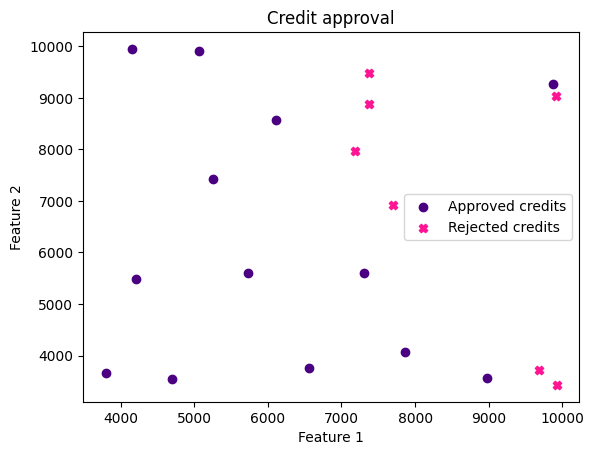

In [129]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n* Accuracy is: {accuracy}")

#derivation of the matrix of incorrectly classified examples
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n* The matrix of incorrectly classified examples:")
print(conf_matrix)

#output of the classification report
class_report = classification_report(y_test, y_pred)
print("\n* The classification report:")
print(class_report)


a_category = X_test[y_test == 1]
r_category = X_test[y_test == 0]

#plot for "approved" credits
plt.scatter(a_category.iloc[:, 0], a_category.iloc[:, 1], label='Approved credits', c='indigo', marker='o')

#plot for "rejected" credits
plt.scatter(r_category.iloc[:, 0], r_category.iloc[:, 1], label='Rejected credits', c='deeppink', marker='X')

plt.title('Credit approval')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()